In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import PIL
print('Pillow Version:', PIL.__version__)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Pillow Version: 7.1.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
Data = []
name=[]
nameupd=[]
imgName= []
pth = '/content/drive/MyDrive/F4'
for j in os.listdir(pth):
  imgName.append(j)
  name.append(pth+'/'+ j)
  nameupd.append('/content/drive/MyDrive/Updated4/'+ j)
  img = cv2.imread(pth+'/'+ j)
  Data.append(img)

In [ ]:
name[0]

'/content/drive/MyDrive/F4/ISIC_0058212.jpg'

In [ ]:
imgName[0]

'ISIC_0058212.jpg'

#### Dull Razor Steps 
1-Converting The Image to GrayScale.
2-Apply the "BlackHat" operation By using "Cross" struct -- Closing Operation.
3-Apply the threshold value to the output from step 2.
4-inpaint with the original image and the thresholded image.

In [ ]:
def hair_remove(image):
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # apply thresholding to blackhat
    threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold[1],1,cv2.INPAINT_TELEA)
    
    return final_image

### Importing Data 

In [ ]:
for i,image_name in enumerate(name[:]):

    
    # fig = plt.figure(figsize=(10,5))
    
    # print(nameupd[i])
    image = cv2.imread(image_name)
    image_resize = cv2.resize(image,(450,450))
    # plt.subplot(1, 2, 1)
    # plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.title('Original : '+ image_name)

    final_image = hair_remove(image_resize)
    # plt.subplot(1, 2, 2)
    # plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.title('Hair Removed : '+ image_name)
    
    # plt.plot()
    result=cv2.imwrite(nameupd[i],final_image)

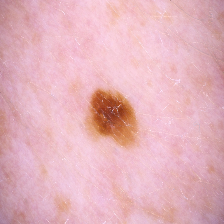

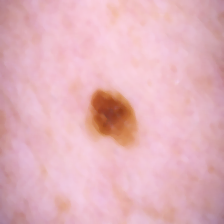

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/archive/ISIC_0082348.jpg') # Load image
dim = (224,224)
img=cv2.resize(img,dim)
img_median = cv2.medianBlur(img, 5) # Add median filter to image
cv2_imshow(img)

cv2_imshow(img_median) # Display img with median filter